# LAB3 PERCEPTRON

### V.VISHNU DUT

### 16BCE1103


In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets as db
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
col_Names=["area", "perimeter", "compactness", "lengthOfKernel", "widthOfKernel", "asymmetryCoefficient", "lengthOfKernelGroove", "TypeOfWheatSeed"]
dataseed= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)

In [3]:
dataseed.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [5]:
dataseed.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
y = dataseed.iloc[0:100, 4].values

In [7]:
y = np.where( y == 'Iris-setosa', -1, 1)

In [8]:
X = dataseed.iloc[0:100, [0, 2]].values

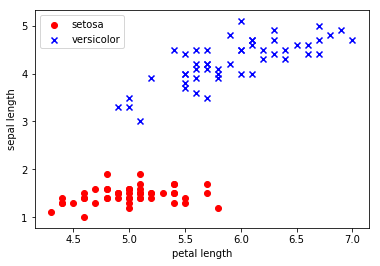

In [9]:
plt.scatter(X[:50, 0], X[:50, 1],
           color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc = 'upper left')
plt.show()

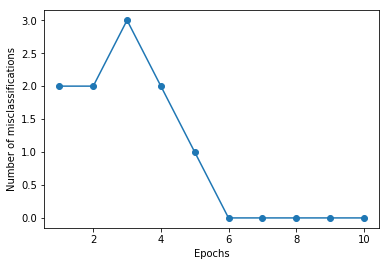

In [10]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [11]:
from matplotlib.colors import ListedColormap

In [12]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v') 
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1    
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)    
    Z = Z.reshape(xx1.shape)    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)    
    plt.xlim(xx1.min(), xx1.max())    
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):        
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],                    
                    alpha=0.8, c=cmap(idx),                    
                    marker=markers[idx], label=cl)

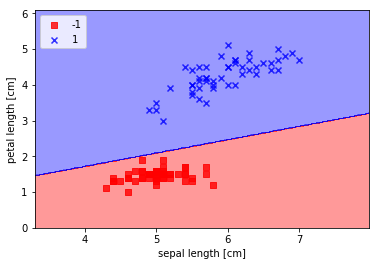

In [13]:
plot_decision_regions(X, y, classifier = ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

# Implementing for my own dataset


In [14]:
from sklearn.linear_model import Perceptron

In [15]:
clf = Perceptron(random_state = 1, max_iter = 10, 
                 shuffle = True, verbose = 1, alpha = 0.01)

In [23]:
col_Names=["area", "perimeter", "compactness", "lengthOfKernel", "widthOfKernel", "asymmetryCoefficient", "lengthOfKernelGroove", "TypeOfWheatSeed"]
data = pd.read_csv("seeds_dataset.csv",names=col_Names, header = None)

In [27]:
X = data[["lengthOfKernelGroove", "lengthOfKernel"]]

In [28]:
Y = data["TypeOfWheatSeed"]

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
X_std = scaler.fit_transform(X)

In [32]:
from sklearn.cross_validation import train_test_split

/Users/vishnuvenkatesh/Documents/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X_std,Y)

In [34]:
clf.fit(X_train, Y_train)

-- Epoch 1
Norm: 6.41, NNZs: 2, Bias: -1.000000, T: 157, Avg. loss: 0.295139
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 8.29, NNZs: 2, Bias: 0.000000, T: 314, Avg. loss: 0.136417
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.11, NNZs: 2, Bias: 0.000000, T: 471, Avg. loss: 0.104930
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.30, NNZs: 2, Bias: -2.000000, T: 628, Avg. loss: 0.123024
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.95, NNZs: 2, Bias: -1.000000, T: 785, Avg. loss: 0.154179
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 10.41, NNZs: 2, Bias: 0.000000, T: 942, Avg. loss: 0.114034
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 10.79, NNZs: 2, Bias: 0.000000, T: 1099, Avg. loss: 0.150510
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 10.68, NNZs: 2, Bias: -1.000000, T: 1256, Avg. loss: 0.109331
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 11.20, NNZs: 2, Bias: -2.000000, T: 1413, Avg. loss: 0.120247
Total training time: 0.0

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


Perceptron(alpha=0.01, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=10, n_iter=None, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=1, warm_start=False)

In [35]:
Y_pred = clf.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(Y_pred, Y_test)

0.9056603773584906

# Accuracy = 90.56%
